In [1]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Inspiration for code:

- https://developers.google.com/machine-learning/guides/text-classification/
- https://github.com/google/eng-edu/blob/master/ml/guides/text_classification/load_data.py

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import random
import time
import pickle

import numpy as np
import pandas as pd

from importlib import reload

import scipy.sparse

In [3]:
from w266_common import utils, vocabulary
from helpers import load_data
from helpers import explore_data
from helpers import preprocess_data

## Load the data

In [10]:
pwd

'/home/yulia/final-project/Classification'

In [10]:
data_path = '/home/yulia/final-project/data/raw/hein-daily'

In [11]:
reload(load_data)
all_speech_ids, all_speeches = load_data.load_speech_data(data_path)


File speeches_097.txt has 249718612 characters
and 283399 speeches

Speeches list has 283399 speeches

File speeches_098.txt has 252071246 characters
and 280289 speeches

Speeches list has 563688 speeches

File speeches_099.txt has 265326480 characters
and 281528 speeches

Speeches list has 845216 speeches

File speeches_100.txt has 270610780 characters
and 276162 speeches

Speeches list has 1121378 speeches

File speeches_101.txt has 261004871 characters
and 251217 speeches

Speeches list has 1372595 speeches

File speeches_102.txt has 271650630 characters
and 243092 speeches

Speeches list has 1615687 speeches

File speeches_103.txt has 249908822 characters
and 235974 speeches

Speeches list has 1851661 speeches

File speeches_104.txt has 280355367 characters
and 274985 speeches

Speeches list has 2126646 speeches

File speeches_105.txt has 235226903 characters
and 209267 speeches

Speeches list has 2335913 speeches

File speeches_106.txt has 243801385 characters
and 209648 speeches

In [12]:
len(all_speech_ids), len(all_speeches)

(3866201, 3866201)

## Create target labels

In [ ]:
# OPEN descr FROM A SAVED FILE (if it was previously saved)
outdata_path = '/home/yulia/final-project/Classification/data'
descr = pickle.load(open(os.path.join(outdata_path, 'descr.p'), 'rb'))

In [4]:
reload(load_data)
start_time = time.time()
# taking a 30% sample of the full description file
descr = load_data.load_descr_data('/home/yulia/final-project/data/QA/full_descr.txt', p=0.3)
print("\nIt took {0:.1f} seconds to create the dictionary".format(time.time()-start_time))

Random congressperson: 1030122784
date 19931120
char_count 1677
word_count 274
speakerid 103109801.0
Party R
Congress 103
Chamber S
State WY
Ethnicity W
Age 63.0
Age_lt_med 0.0
NonWhite 0.0
Female 0.0
speaker Mr. SIMPSON
Full Name SIMPSON, ALAN
match fuzzy

It took 87.0 seconds to create the dictionary


In [5]:
# check if sampling worked
len(list(descr.keys()))/2914464

0.2970405535975054

In [13]:
gender, ethnicity, age, party, chamber, congress = load_data.create_target_labels(all_speech_ids, descr)
len(gender), len(ethnicity), len(age), len(party), len(chamber), len(congress)

(3866201, 3866201, 3866201, 3866201, 3866201, 3866201)

### Save descr dictionary

In [7]:
pickle.dump(descr, open(os.path.join(outdata_path, 'descr.p'), 'wb'))

In [8]:
descr = pickle.load(open(os.path.join(outdata_path, 'descr.p'), 'rb'))

### Data QA

In [14]:
reload(explore_data)
for i in [(gender, "Gender"), (ethnicity, "Ethnicity"), (age, "Age")]:
    print("\n", i[1])
    print("Overall speech counts:")
    explore_data.get_counts(i[0])
    print("Target group number of speeches by party:")
    explore_data.get_counts_by_category(i[0], party)


 Gender
Overall speech counts:


,Category,Count
0,-1,3000487
1,0,795961
2,1,69753


Target group number of speeches by party:
A: 	 0
D: 	 50612
I: 	 0
N: 	 0
NA: 	 -3000487
P: 	 0
R: 	 19141

 Ethnicity
Overall speech counts:


,Category,Count
0,-1,3000487
1,0,790030
2,1,75684


Target group number of speeches by party:
A: 	 8
D: 	 67277
I: 	 23
N: 	 97
NA: 	 -3000487
P: 	 18
R: 	 8261

 Age
Overall speech counts:


,Category,Count
0,-1,3000487
1,0,563747
2,1,301967


Target group number of speeches by party:
A: 	 8
D: 	 149340
I: 	 123
N: 	 97
NA: 	 -3000487
P: 	 18
R: 	 152381


In [17]:
reload(explore_data)
explore_data.random_speech(all_speeches, all_speech_ids, gender, descr)

Speaker information
date 19830524
char_count 2004
word_count 346
speakerid 98108520.0
Party R
Congress 98
Chamber H
State RI
Ethnicity W
Age 37.0
Age_lt_med 1.0
NonWhite 0.0
Female 1.0
speaker Mrs. SCHNEIDER
Full Name SCHNEIDER, CLAUDINE
match fuzzy

Mr. Speaker. today the House is voting on H.R. 2807. a bill that sets a $93.2 million authorization relling for 1982 for title III of the Older Americans Act and authorizes $6.8 million for fiscal year 1982 reimbursement purposes. Title III. as you know. provides both congregate and home delivered nutritional services to millions of seniors throughout the country. In my own State of Rhode Island for instance. in 1982. 54 meal sites served over 1 million meals to seniors over the age of 60. In visiting numerous meal sites throughout the State. I have been continually impressed by the quality of food served. the level of competence displayed by the site workers. and the large number of seniors who rely on the program for their one square mea

In [20]:
explore_data.random_speech(all_speeches, all_speech_ids, ethnicity, descr)

Speaker information
date 19930223
char_count 134
word_count 28
speakerid 103112360.0
Party D
Congress 103
Chamber H
State MO
Ethnicity B
Age 63.0
Age_lt_med 0.0
NonWhite 1.0
Female 0.0
speaker Mr. CLAY
Full Name CLAY, WILLIAM
match exact

Mr. Speaker. I object to the vote on the ground that a quorum is not present and make the point of order that a quorum is not present.


In [22]:
explore_data.random_speech(all_speeches, all_speech_ids, age, descr)

Speaker information
date 20021001
char_count 5758
word_count 969
speakerid 107116070.0
Party R
Congress 107
Chamber H
State IN
Ethnicity W
Age 52.0
Age_lt_med 1.0
NonWhite 0.0
Female 0.0
speaker Mr. SOUDER
Full Name SOUDER, MARK
match exact

Mr. Speaker. we have many. many difficult and complex issues that we each face every day. We just heard from the gentlewoman from Ohio . my friend and colleague. about war. Most of us spend probably the majority of our time. or at least the largest percentage of our time. dealing with economic growth and recovery. jobs. and what we need to do to help attract or keep companies in our district. and the regulatory issues. and many other things. We also work regularly on other issues that come up. For example. I am chairing a hearing Thursday on the West Nile virus which has particularly hit my hometown hard. We just had an hour debate on moral issues. But in addition to these kinds of issues. we deal inside the Federal budget with an incredible array 

# Gender Model

## Split into train, validate, test

### Filter on party if necessary

In [28]:
reload(load_data)
# all_speeches_d, all_speech_ids_d, gender_d = load_data.filter_data(all_speeches, all_speech_ids, gender, party, 'D')
# len(all_speeches_d), len(all_speech_ids_d), len(gender_d)

In [37]:
reload(explore_data)
# explore_data.get_counts(gender_d)

,Category,Count
0,0,103864
1,1,2172


### Split into train/val/test

#### Split by congress

In [9]:
# reload(preprocess_data)
# train, train_ids, train_target, val, val_ids, val_target, test, test_ids, test_target = preprocess_data.split_by_congress(all_speeches, all_speech_ids, gender, descr, congress)

In [15]:
reload(preprocess_data)
train, train_ids, train_target, val, val_ids, val_target, test, test_ids, test_target = preprocess_data.split_train_val_test(all_speeches, all_speech_ids, gender, descr)

Training split: 28904 ones and 28904 zeroes
Training speech list size: 57808
Training target list size: 57808
Validation split: 9634 ones and 9634 zeroes
Validation speech list size: 19268
Validation target list size: 19268
Test split: 9636 ones and 9636 zeroes
Test speech list size: 19272
Test target list size: 19272


In [16]:
sum(train_target), sum(val_target), sum(test_target)

(28904, 9634, 9636)

In [17]:
# number of speeches under 30 words
sum(np.array(gender)==1) - (sum(train_target) + sum(val_target) + sum(test_target))

21579

In [26]:
# random speech from a train set where gender=1
explore_data.random_speech(train, train_ids, train_target, descr)

Speaker information
date 19970430
char_count 2766
word_count 444
speakerid 105115120.0
Party R
Congress 105
Chamber H
State OH
Ethnicity W
Age 47.0
Age_lt_med 1.0
NonWhite 0.0
Female 1.0
speaker Ms. PRYCE of Ohio
Full Name PRYCE, DEBORAH
match exact

Mr. Speaker. I thank the distinguished vice chairman of the committee. the gentleman from California for yielding me this time. Mr. Speaker. I- rise to express my support for both this open rule and the Housing Opportunity Responsibility Act. First. I want to commend the chairman. the gentleman from New York . and the Subcommittee on Housing and Community Opportunity of the Committee on Banking and Financial Services for crafting legislation that follows our basic principles of. No. 1. making the American dream of affordable housing more attainable. No. 2. empowering individuals to improve their lives. No. 3. returning more decisionmaking authority to States and localities where it belongs. Mr. Speaker. H.R. 2 does all of these things. fun

## EDA on train data

Source: https://developers.google.com/machine-learning/guides/text-classification/step-2

### Check median number of words per sample in train/val/test

In [27]:
reload(explore_data)

<module 'helpers.explore_data' from '/home/yulia/final-project/Classification/helpers/explore_data.py'>

In [18]:
explore_data.get_num_words_per_sample(train)

253.0

In [19]:
explore_data.get_num_words_per_sample(val)

254.0

In [20]:
explore_data.get_num_words_per_sample(test)

254.0

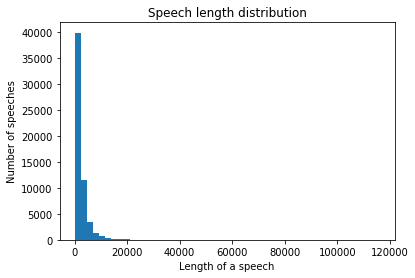

In [21]:
explore_data.plot_sample_length_distribution(train)

### Most popular unigrams (training only)

In [22]:
# take a sample to avoid running out of memory
train_sample = random.sample(train, int(len(train)*0.2))
len(train_sample)

11561

['the', 'to', 'of', 'and', 'in', 'that', 'is', 'for', 'this', 'we', 'it', 'on', 'have', 'are', 'as', 'not', 'be', 'our', 'with', 'will', 'from', 'by', 'they', 'has', 'mr', 'was', 'would', 'my', 'their', 'an', 'bill', 'at', 'who', 'but', 'he', 'all', 'or', 'his', 'do', 'people', 'president', 'which', 'been', 'these', 'about', 'there', 'what', 'so', 'you', 'more']


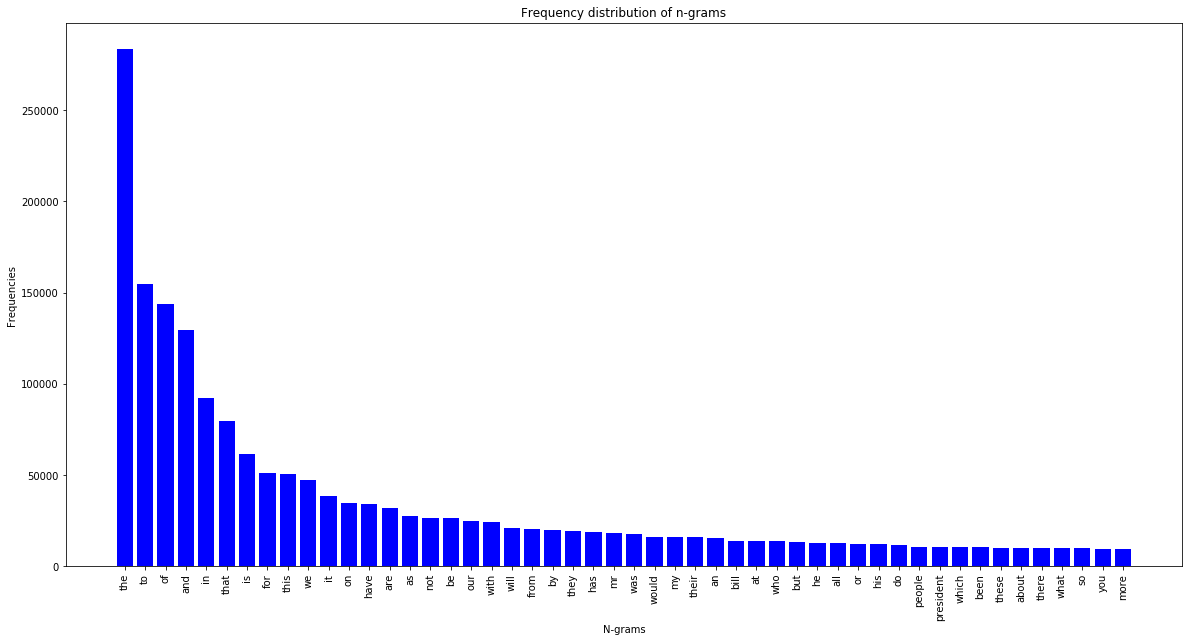

In [23]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(1,1))

### Most popular bigrams (training only)

['of the', 'in the', 'to the', 'it is', 'and the', 'on the', 'for the', 'that the', 'mr speaker', 'to be', 'we have', 'we are', 'that is', 'that we', 'by the', 'with the', 'of this', 'in this', 'united states', 'the united', 'is the', 'this bill', 'mr president', 'going to', 'at the', 'this is', 'want to', 'will be', 'of our', 'from the', 'has been', 'is not', 'my colleagues', 'have been', 'the senate', 'they are', 'the bill', 'the gentleman', 'do not', 'there is', 'to do', 'the house', 'one of', 'as the', 'the american', 'would be', 'to make', 'have to', 'the president', 'we can']


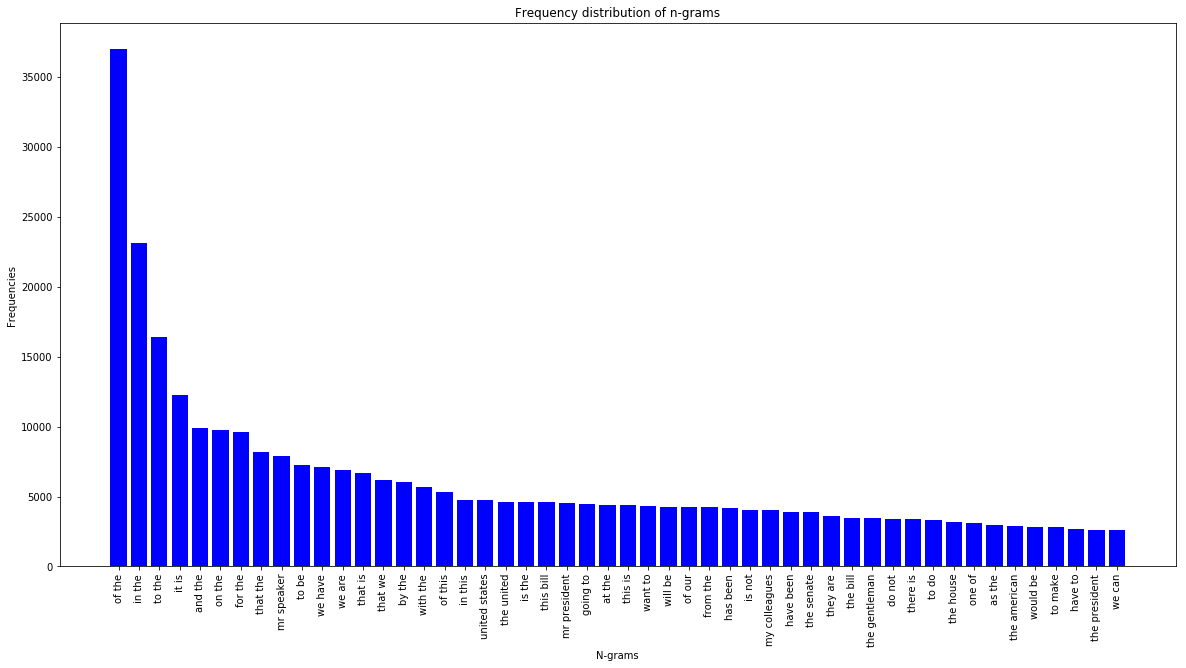

In [24]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(2,2))

### Most popular trigrams (training only)

#### Run this only on small samples

['the united states', 'the gentleman from', 'one of the', 'are going to', 'my colleagues to', 'would like to', 'the american people', 'the senator from', 'be able to', 'the department of', 'we need to', 'of the united', 'mr speaker rise', 'as well as', 'the federal government', 'urge my colleagues', 'member of the', 'we are going', 'in the united', 'is going to', 'it is not', 'that we have', 'rise today to', 'chairman of the', 'in this country', 'in order to', 'that we are', 'ask unanimous consent', 'in support of', 'there is no', 'the committee on', 'going to be', 'part of the', 'some of the', 'percent of the', 'men and women', 'speaker rise today', 'the fact that', 'the people of', 'we do not', 'the state of', 'thank the gentleman', 'we have to', 'members of the', 'and that is', 'of the senate', 'unanimous consent that', 'of the house', 'and it is', 'that is the']


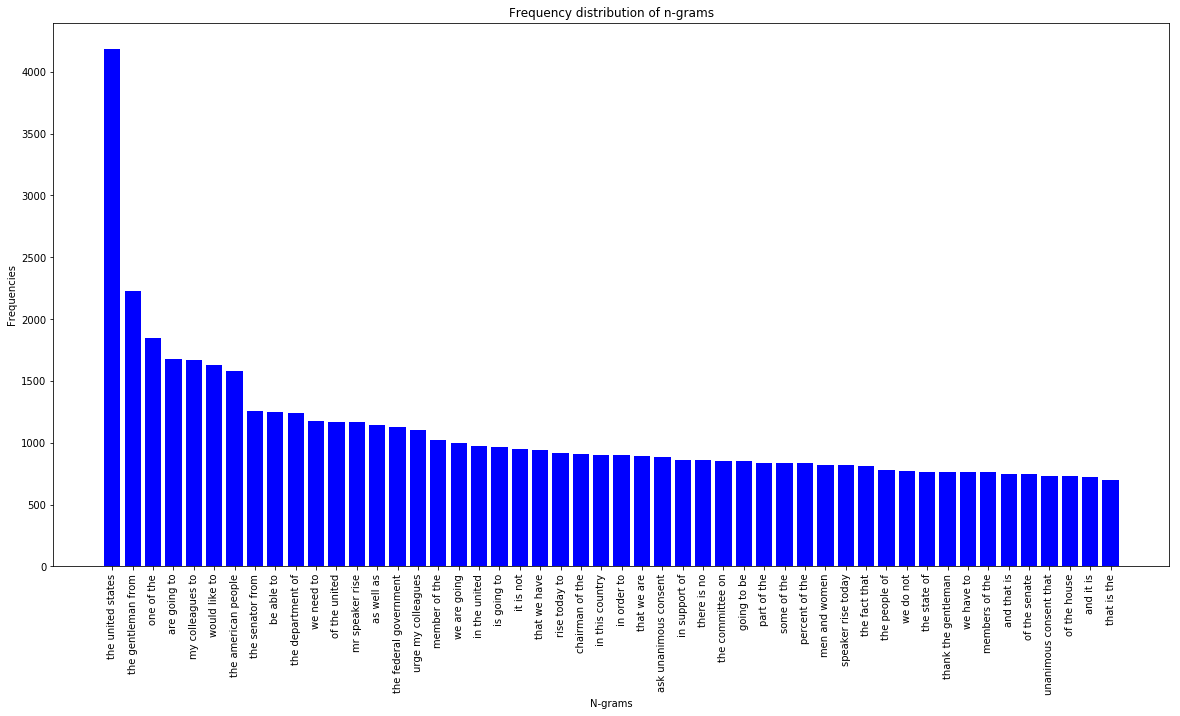

In [25]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(3,3))

In [26]:
reload(explore_data)
explore_data.ngrams_by_category(train, train_ids, descr, congress, 'Congress', p=0.3, top_n=5)


For Congress 97 top 5 (3, 3) ngrams are:
the united states
would like to
the senator from
the gentleman from
one of the
--------------------

For Congress 98 top 5 (3, 3) ngrams are:
the united states
would like to
the gentleman from
one of the
the senator from
--------------------

For Congress 99 top 5 (3, 3) ngrams are:
the united states
would like to
the gentleman from
the senator from
one of the
--------------------

For Congress 100 top 5 (3, 3) ngrams are:
the united states
would like to
the gentleman from
the senator from
one of the
--------------------

For Congress 101 top 5 (3, 3) ngrams are:
the united states
the gentleman from
would like to
one of the
my colleagues to
--------------------

For Congress 102 top 5 (3, 3) ngrams are:
the united states
the gentleman from
would like to
one of the
are going to
--------------------

For Congress 103 top 5 (3, 3) ngrams are:
the united states
the senator from
are going to
the gentleman from
one of the
--------------------

For Co

## N-gram model

Inspiration for code: https://developers.google.com/machine-learning/guides/text-classification/step-3

### Pre-processing

In [27]:
# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)

# Minimum corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 5

# Maximum proportion of corpus containing a word above which a token will be discarded.
# Helps eliminate stop words
MAX_DOCUMENT_FREQUENCY = 0.7

# Limit on the number of features. We use the top 20K features.
TOP_K = 10000

# Output number of top/bottom scoring ngrams
TOP_N = 5

model_params = {
    'ngram_range': NGRAM_RANGE,
    'min_df': MIN_DOCUMENT_FREQUENCY,
    'max_df': MAX_DOCUMENT_FREQUENCY,
    'top_k': TOP_K,
    'top_n': TOP_N
}

In [28]:
reload(preprocess_data)
train_vec, val_vec, test_vec = preprocess_data.ngram_vectorize(train, train_target, val, test, **model_params)

Total vocabulary size: 407427
Number of stop words 3064007

Top 5 ngrams by differentiating score:
mr president 	 1755.4
women 	 1274.7
our 	 1136.6
president 	 1117.8
rise 	 1067.8

Bottom 5 ngrams by differentiating score:
harkin of 	 0.0
box is 	 0.0
rights violations 	 0.0
great tribute 	 0.0
money instead 	 0.0


In [29]:
len(train), len(val), len(test)

(57808, 19268, 19272)

In [30]:
train_vec.shape, val_vec.shape, test_vec.shape

((57808, 10000), (19268, 10000), (19272, 10000))

### Saving processed files

In [40]:
pwd

'/home/yulia/final-project/Classification'

In [31]:
outdata_path = '/home/yulia/final-project/Classification/data'

In [32]:
scipy.sparse.save_npz(os.path.join(outdata_path, 'train_vec.npz'), train_vec)
scipy.sparse.save_npz(os.path.join(outdata_path, 'val_vec.npz'), val_vec)
scipy.sparse.save_npz(os.path.join(outdata_path, 'test_vec.npz'), test_vec)

In [33]:
train_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'train_vec.npz'))
val_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'val_vec.npz'))
test_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'test_vec.npz'))

In [34]:
train_vec.shape, val_vec.shape, test_vec.shape

((57808, 10000), (19268, 10000), (19272, 10000))

In [35]:
with open(os.path.join(outdata_path, 'train_list'), 'wb') as fp:
    pickle.dump(train, fp)
with open(os.path.join(outdata_path, 'train_ids'), 'wb') as fp:
    pickle.dump(train_ids, fp)
with open(os.path.join(outdata_path, 'train_target'), 'wb') as fp:
    pickle.dump(train_target, fp)
with open(os.path.join(outdata_path, 'val_list'), 'wb') as fp:
    pickle.dump(val, fp)
with open(os.path.join(outdata_path, 'val_ids'), 'wb') as fp:
    pickle.dump(val_ids, fp)
with open(os.path.join(outdata_path, 'val_target'), 'wb') as fp:
    pickle.dump(val_target, fp)
with open(os.path.join(outdata_path, 'test_list'), 'wb') as fp:
    pickle.dump(test, fp)
with open(os.path.join(outdata_path, 'test_ids'), 'wb') as fp:
    pickle.dump(test_ids, fp)
with open(os.path.join(outdata_path, 'test_target'), 'wb') as fp:
    pickle.dump(test_target, fp)

In [36]:
sum(train_target), sum(val_target), sum(test_target)

(28904, 9634, 9636)

In [ ]:
with open(os.path.join(outdata_path, 'train_list'), 'rb') as fp:
    train = pickle.load(fp)
with open(os.path.join(outdata_path, 'train_ids'), 'rb') as fp:
    train_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'train_target'), 'rb') as fp:
    train_target = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_list'), 'rb') as fp:
    val = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_ids'), 'rb') as fp:
    val_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_target'), 'rb') as fp:
    val_target = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_list'), 'rb') as fp:
    test = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_ids'), 'rb') as fp:
    test_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_target'), 'rb') as fp:
    test_target = pickle.load(fp)

In [ ]:
sum(train_target), sum(val_target), sum(test_target)

### Model: Multi-Layer Perceptron (Vanilla NN)

In [37]:
import tensorflow as tf

from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

/home/yulia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [38]:
logs_base_dir = "/home/yulia/final-project/Classification/logs"

In [39]:
def mlp_model(layers, units, dropout_rate, input_shape, num_classes):
    """
    Creates an instance of a multi-layer perceptron model.

    Arguments
        layers: int, number of `Dense` layers in the model.
        units: int, output dimension of the layers.
        dropout_rate: float, percentage of input to drop at Dropout layers.
        input_shape: tuple, shape of input to the model.
        num_classes: int, number of output classes.

    Returns
        An MLP model instance.
    """
    op_units, op_activation = 1, 'sigmoid'
    model = models.Sequential()
    model.add(Dropout(rate=dropout_rate, input_shape=input_shape))

    for _ in range(layers-1):
        model.add(Dense(units=units, activation='relu'))
        model.add(Dropout(rate=dropout_rate))

    model.add(Dense(units=op_units, activation=op_activation))
    
    return model

In [40]:
class TimeHistory(tf.keras.callbacks.Callback):
    """
    https://stackoverflow.com/questions/43178668/
    record-the-computation-time-for-each-epoch-in-keras-during-model-fit
    """
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [41]:
def train_ngram_model(data,
                      learning_rate=1e-3,
                      epochs=1000,
                      batch_size=128,
                      layers=2,
                      units=64,
                      dropout_rate=0.2):
    """
    Trains n-gram model on the given dataset.

    Arguments:
        data: tuples of vectorized training and test texts and labels.
        learning_rate: float, learning rate for training model.
        epochs: int, number of epochs.
        batch_size: int, number of samples per batch.
        layers: int, number of `Dense` layers in the model.
        units: int, output dimension of Dense layers in the model.
        dropout_rate: float: percentage of input to drop at Dropout layers.

    Returns:
        tuple with accuracy and loss on validation data for the last interation
    """
    # Get the data.
    (x_train, train_labels), (x_val, val_labels) = data

    # Verify that validation labels are in the same range as training labels.
    num_classes = 2

    # Create model instance.
    model = mlp_model(layers=layers,
                                  units=units,
                                  dropout_rate=dropout_rate,
                                  input_shape=x_train.shape[1:],
                                  num_classes=num_classes)

    # Compile model with learning parameters.
    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

    # Create callback for early stopping on validation loss. If the loss does
    # not decrease in two consecutive tries, stop training.
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                         patience=2),
        tf.keras.callbacks.TensorBoard(log_dir=logs_base_dir, 
                                       histogram_freq=0, 
                                       write_graph=True, 
                                       write_images=True),
        TimeHistory()]

    # Train and validate model.
    history = model.fit(
            x_train,
            train_labels,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=(x_val, val_labels),
            verbose=2,  # Logs once per epoch.
            batch_size=batch_size)

    # Print results.
    history = history.history
    print('Validation accuracy: {acc}, loss: {loss}'.format(
            acc=history['val_acc'][-1], loss=history['val_loss'][-1]))
    
    train_pred_probs = model.predict(x_train)
    val_pred_probs = model.predict(x_val)

    return history, train_pred_probs, val_pred_probs

In [42]:
history, train_pred_probs, val_pred_probs = train_ngram_model(((train_vec, train_target), (val_vec, val_target)))

Train on 57808 samples, validate on 19268 samples
Epoch 1/1000
 - 16s - loss: 0.5786 - acc: 0.7014 - val_loss: 0.5456 - val_acc: 0.7229
Epoch 2/1000
 - 16s - loss: 0.5073 - acc: 0.7490 - val_loss: 0.5364 - val_acc: 0.7328
Epoch 3/1000
 - 16s - loss: 0.4816 - acc: 0.7643 - val_loss: 0.5397 - val_acc: 0.7320
Epoch 4/1000
 - 16s - loss: 0.4662 - acc: 0.7720 - val_loss: 0.5439 - val_acc: 0.7304
Validation accuracy: 0.730433880070173, loss: 0.5438631458576473


## Model evaluation

In [43]:
val_preds = val_pred_probs > 0.5
np.sum(val_preds.flatten()==val_target)

14074

Confusion matrix, without normalization
[[7014 2620]
 [2574 7060]]


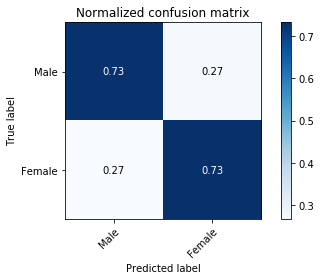

In [44]:
reload(explore_data)
# specify class names in 0 - 1 order
classes = ['Male', 'Female']
explore_data.plot_confusion_matrix(val_target, val_preds, classes, normalize=True)

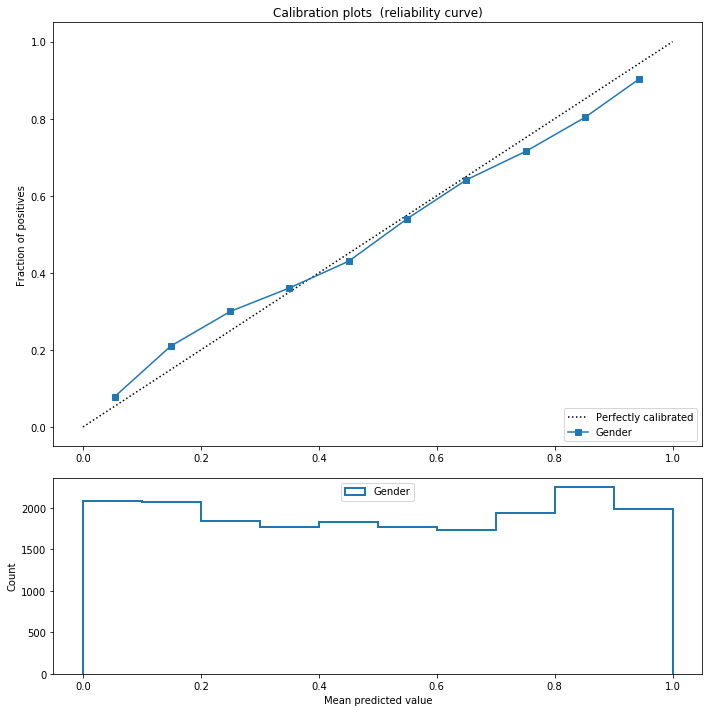

In [45]:
reload(explore_data)
explore_data.plot_calibration_curve(val_target, val_pred_probs, 'Gender')

#### Run the following test on a random subset of the validation sample

In [46]:
val_random = np.random.choice(a=[0,1], size=len(val_target), p = [0.7,0.3])
val_random.sum()/val_random.shape[0]

0.3004463358937098

In [49]:
val_sample = np.array(val)[val_random==1]
val_ids_sample = np.array(val_ids)[val_random==1]
val_pred_probs_sample = val_pred_probs[val_random==1]
val_sample.shape, val_ids_sample.shape, val_pred_probs_sample.shape

((5789,), (5789,), (5789, 1))

In [68]:
reload(explore_data)
# checking the ratios of demo variables in low-mid-high probability buckets
explore_data.check_bin_probs_distr(val_pred_probs_sample, 
                                   val_ids_sample, 
                                   descr)

Finished building main df
Finished bin 0.4
Finished bin 0.6
Finished bin 1.0


,Gender_F,Ethinicity_NW,AvgAge,Party_D,Chamber_H,AvgWordCount
0.4,0.45,0.45,0.99,0.83,0.77,0.98
0.6,0.97,0.84,0.98,0.98,1.10,0.88
1.0,1.54,1.60,1.01,1.18,1.18,1.08


In [74]:
reload(explore_data)
explore_data.compare_ngrams(val_sample, val_pred_probs_sample)


Top 10 ngrams by differentiating score:
my colleagues to 	 70.3
mr speaker rise 	 60.1
urge my colleagues to 	 57.4
urge my colleagues 	 54.5
speaker rise today 	 44.0
unanimous consent that 	 43.0
ask unanimous consent 	 41.0
colleagues to support 	 39.9
have legislative days 	 39.6
and extend their 	 39.6


,0.4,0.6,1.0
ask unanimous consent,253.0,74.0,92.0
colleagues to support,46.0,42.0,184.0
have legislative days,5.0,23.0,0.0
mr speaker rise,124.0,113.0,365.0
my colleagues to,180.0,154.0,517.0
revise and extend their,5.0,23.0,0.0
speaker rise today,89.0,84.0,267.0
unanimous consent that,221.0,66.0,67.0
urge my colleagues,122.0,95.0,365.0
urge my colleagues to,98.0,90.0,335.0


In [69]:
reload(explore_data)
explore_data.ngrams_by_bin(val_sample, val_pred_probs_sample)


In 0.4 bin top 10 ngrams:

the united states
the gentleman from
the senator from
would like to
one of the
are going to
chairman of the
the american people
ask unanimous consent
of the senate
--------------------

In 0.6 bin top 10 ngrams:

the united states
the gentleman from
my colleagues to
one of the
would like to
are going to
the american people
in the united
mr speaker rise
in the united states
--------------------

In 1.0 bin top 10 ngrams:

the united states
my colleagues to
the gentleman from
one of the
urge my colleagues
mr speaker rise
the american people
urge my colleagues to
we need to
would like to
--------------------


In [71]:
reload(explore_data)
explore_data.print_mispredictions(val_target, val_pred_probs, val, val_ids, descr)


True positive (Predicted prob: 0.93):

date 20110118
char_count 436
word_count 79
speakerid 112119920.0
Party D
Congress 112
Chamber H
State TX
Ethnicity B
Age 62.0
Age_lt_med 0.0
NonWhite 1.0
Female 1.0
speaker Ms. JACKSON LEE of Texas
Full Name JACKSON LEE, SHEILA
match exact

 Thank you so very much. Maybe they would not be able to withstand this onslaught on their rights because the Constitution guarantees them equal protection. And some who have insurance and some who do not would not be treated equally. And finally. let me say that in Texas. the Department of Insurance has said that this bill helps Texans. I hope my colleague from Texas will vote not to repeal this bill. I will vote "no" on the repeal.
--------------------

True negative (Predicted prob: 0.04):

date 19930615
char_count 238
word_count 42
speakerid 103118361.0
Party R
Congress 103
Chamber S
State KY
Ethnicity W
Age 52.0
Age_lt_med 1.0
NonWhite 0.0
Female 0.0
speaker Mr. MCCONNELL
Full Name MCCONNELL, MITCH
match 